In [ ]:
!rm -rf *
!wget -nc https://course.ccs.neu.edu/cs6220/fall2023/homework-6/assignment6.npz

--2023-11-14 17:15:09--  https://course.ccs.neu.edu/cs6220/fall2023/homework-6/assignment6.npz
Resolving course.ccs.neu.edu (course.ccs.neu.edu)... 129.10.117.35
Connecting to course.ccs.neu.edu (course.ccs.neu.edu)|129.10.117.35|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 33270 (32K)
Saving to: ‘assignment6.npz’

assignment6.npz     100%[===================>]  32.49K  --.-KB/s    in 0.02s   

2023-11-14 17:15:10 (1.40 MB/s) - ‘assignment6.npz’ saved [33270/33270]



In [ ]:
#@title Let's read the data

import numpy as np

data = np.load("assignment6.npz")
# The data that you will read in
scores_small = data['scores_small']
scores_large = data['scores_large']
labels_small = data['labels_small']
labels_large = data['labels_large']

In [ ]:
print("scores_small")
print(scores_small)
print("scores_large")
print(scores_large)
print("labels_small")
print(labels_small)
print("labels_large")
print(labels_large)

scores_small
[0.9  0.75 0.3  0.35 0.4  0.65 0.8  0.25 0.29 0.45 0.1  0.81 0.83 0.28]
scores_large
[ 0.07490488  1.81599311 -0.40566216 ...  0.57540931  0.07592341
 -0.65592434]
labels_small
[1 1 0 1 0 1 0 0 0 1 0 1 1 1]
labels_large
[0 1 0 ... 1 1 0]


In [ ]:
import matplotlib.pyplot as plt

def roc_range(scores, labels, maxfpr, minfpr = 0):
  '''
  Inputs:
    scores - predictions from any given classifier
    labels - the true label (either 0, 1) of the data
    maxfpr - the maximum false positive rate (FPR)
    minfpr (optional, default = 0) - the minimum false positive rate (FPR)
  Outputs:
    fpr_in_range - list of FPR values from minpfa to maxpfa
    tpr_in_range - list of true positive rate (TPR) values from minfpr to maxfpr
    auc_in_range - single value of area under curve from minpfa to maxpfa
  '''

  thresholds = np.unique(scores)[::-1]
  fpr_in_range = []
  tpr_in_range = []
  auc_in_range = 0

  for threshold in thresholds:
    # convert to binary predictions based on the threshold
    predictions = np.where(scores >= threshold, 1, 0)

    tp = np.sum((predictions == 1) & (labels == 1))
    fp = np.sum((predictions == 1) & (labels == 0))
    tn = np.sum((predictions == 0) & (labels == 0))
    fn = np.sum((predictions == 0) & (labels == 1))

    fpr = fp / (tn + fp)
    tpr = tp / (tp + fn)

    if minfpr <= fpr <= maxfpr:
      fpr_in_range.append(fpr)
      tpr_in_range.append(tpr)

    # trapezoidal rule
    for i in range(1, len(fpr_in_range)):
      auc_in_range += 0.5 * (tpr_in_range[i] + tpr_in_range[i - 1]) * (fpr_in_range[i] - fpr_in_range[i - 1])

  return fpr_in_range, tpr_in_range, auc_in_range

# 1. Plot the ROC curve and calculate the AUC for the following ranges:


*   a) PFA ∈ [0, 1.0], the full range of thresholds
*   b) PFA ∈ [0, 0.4]
*   c) PFA ∈ [0, 0.75]
*   d) PFA ∈ [0.25, 0.75]

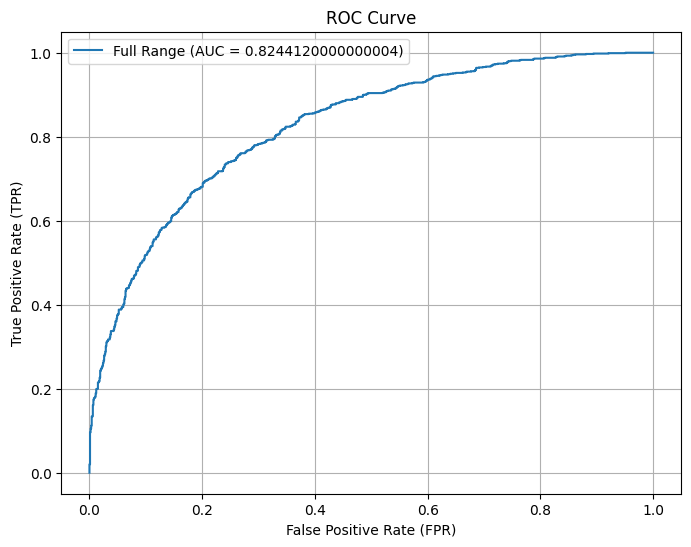

In [ ]:
plt.figure(figsize=(8, 6))

# 1(a) PFA ∈ [0, 1.0], the full range of thresholds
fpr_one, tpr_one, auc_one = roc_range(scores_large, labels_large, maxfpr=1.0, minfpr=0.0)
plt.plot(fpr_one, tpr_one, label=f'Full Range (AUC = {auc_one})')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

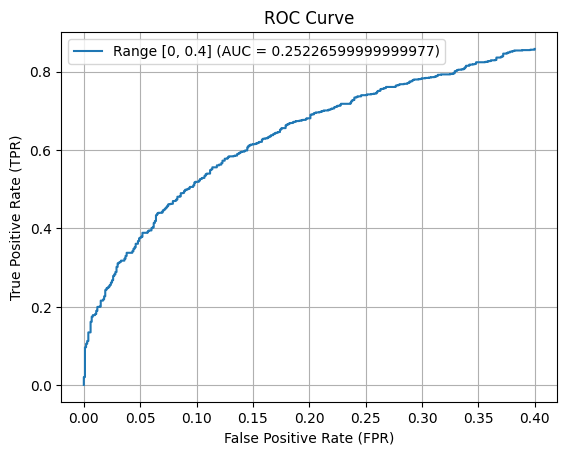

In [ ]:
# 1(b) PFA ∈ [0, 0.4]
fpr_04, tpr_04, auc_04 = roc_range(scores_large, labels_large, maxfpr=0.4, minfpr=0.0)
plt.plot(fpr_04, tpr_04, label=f'Range [0, 0.4] (AUC = {auc_04})')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

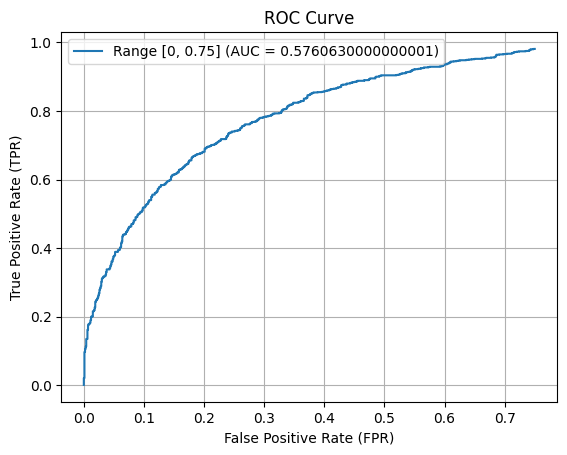

In [ ]:
# 1(c) PFA ∈ [0, 0.75]
fpr_75, tpr_75, auc_75 = roc_range(scores_large, labels_large, maxfpr=0.75, minfpr=0.0)
plt.plot(fpr_75, tpr_75, label=f'Range [0, 0.75] (AUC = {auc_75})')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

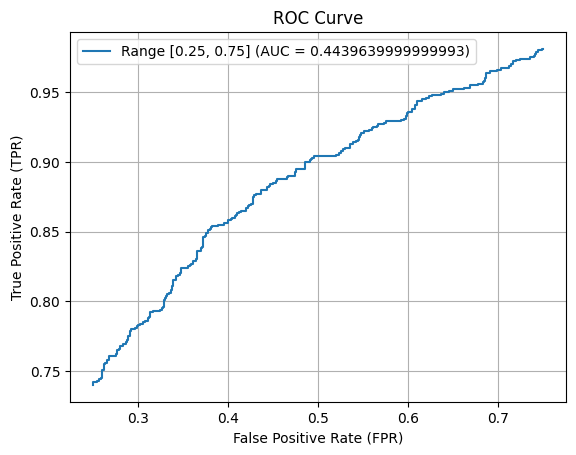

In [ ]:
# 1 (d) PFA ∈ [0.25, 0.75]
fpr_25to75, tpr_25to75, auc_25to75 = roc_range(scores_large, labels_large, maxfpr=0.75, minfpr=0.25)
plt.plot(fpr_25to75, tpr_25to75, label=f'Range [0.25, 0.75] (AUC = {auc_25to75})')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

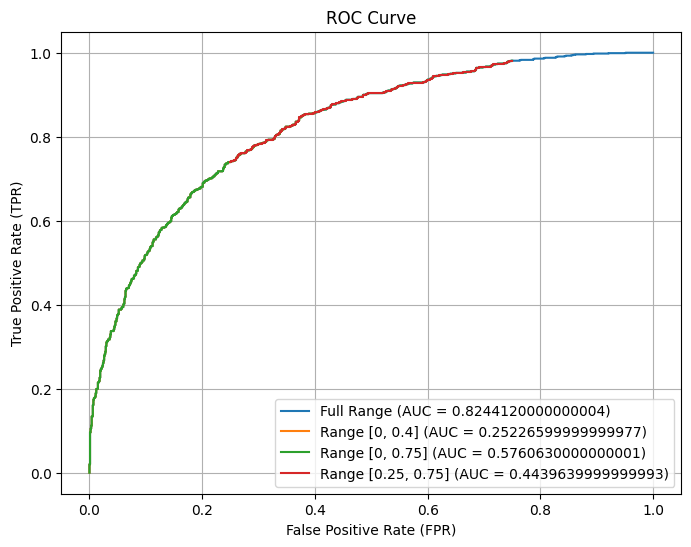

In [ ]:
plt.figure(figsize=(8, 6))

# 1(a) PFA ∈ [0, 1.0], the full range of thresholds
fpr_one, tpr_one, auc_one = roc_range(scores_large, labels_large, maxfpr=1.0, minfpr=0.0)
plt.plot(fpr_one, tpr_one, label=f'Full Range (AUC = {auc_one})')

# 1(b) PFA ∈ [0, 0.4]
fpr_04, tpr_04, auc_04 = roc_range(scores_large, labels_large, maxfpr=0.4, minfpr=0.0)
plt.plot(fpr_04, tpr_04, label=f'Range [0, 0.4] (AUC = {auc_04})')

# 1(c) PFA ∈ [0, 0.75]
fpr_75, tpr_75, auc_75 = roc_range(scores_large, labels_large, maxfpr=0.75, minfpr=0.0)
plt.plot(fpr_75, tpr_75, label=f'Range [0, 0.75] (AUC = {auc_75})')

# 1 (d) PFA ∈ [0.25, 0.75]
fpr_25to75, tpr_25to75, auc_25to75 = roc_range(scores_large, labels_large, maxfpr=0.75, minfpr=0.25)
plt.plot(fpr_25to75, tpr_25to75, label=f'Range [0.25, 0.75] (AUC = {auc_25to75})')

plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

# 2. Your implementation notes:

*   a) Describe your implementation. How would you sweep your thresholds? For each threshold, how would you calculate the PFA and PD? What is the runtime in big-O notation?


> My implementation starts using unique sorted scores as the threshold in descending order. Then converting each score to a binary prediction based on the threshold to calculate True Positive Rate (TPR or PD) and False Positive Rate (FPR). If exists within the threshold, then TPR and FPR are appended to the list. Then it's used to calculate the AUC. Runtime is O(N^2) with a nested for loop.


*   b) Determine the runtime of your implementation in big-O.


> As mentioned in (a), the runtime of my implementation is O(N*2) due to the nested for loop.


*   c) Can you make your implementation run in O(Nlog N)?


> Yes, we can sort the scores in descending order then iterate by calculating TPR and FPR. So we don't have to iterate through every threshold each time. Thus, we can sort (log N) then iterate the sorted scores (N), O(N*log N).



# Precision = TP / (TP + FP)
# Accuracy = (TP + TN) / (TP + TN + FP + FN)

In [39]:
def precision_and_accuracy(scores, labels, given_precision):
  thresholds = np.unique(scores)[::-1]
  precision, accuracy = 0, 0
  res_thresholds = set()
  res_accuracy = []
  for threshold in thresholds:
    prediction = np.where(scores >=threshold, 1, 0)
    tp = np.sum((prediction == 1) & (labels == 1))
    tn = np.sum((prediction == 0) & (labels == 0))
    fn = np.sum((prediction == 0) & (labels == 1))
    fp = np.sum((prediction == 1) & (labels == 0))

    if (tp + fp) != 0:
      precision = tp / (tp + fp)
      if round(precision, 1) == given_precision:
        res_thresholds.add(round(threshold, 3))
        if (tp + tn + fn + fp) != 0:
          accuracy = (tp + tn) / (tp + tn + fn + fp)
          res_accuracy.append(accuracy)
  return res_thresholds, res_accuracy

# 3. What thresholds provide a precision of 0.9?



In [40]:
thresholds_09 = precision_and_accuracy(scores_large, labels_large, 0.9)[0]
print(f'Thresholds provide a precision of 0.9 are \n{sorted(list(thresholds_09))}')

Thresholds provide a precision of 0.9 are 
[0.842, 0.843, 0.853, 0.855, 0.856, 0.858, 0.859, 0.862, 0.863, 0.865, 0.866, 0.867, 0.868, 0.869, 0.87, 0.872, 0.873, 0.874, 0.875, 0.878, 0.879, 0.881, 0.882, 0.883, 0.884, 0.885, 0.886, 0.887, 0.889, 0.89, 0.891, 0.892, 0.893, 0.894, 0.896, 0.897, 0.9, 0.901, 0.905, 0.908, 0.909, 0.912, 0.914, 0.917, 0.918, 0.919, 0.92, 0.921, 0.927, 0.928, 0.93, 0.931, 0.932, 0.933, 0.934, 0.937, 0.938, 0.939, 0.94, 0.942, 0.943, 0.944, 0.946, 0.947, 0.949, 0.954, 0.956, 0.958, 0.959, 0.96, 0.961, 0.962, 0.963, 0.964, 0.967, 0.968, 0.971, 0.972, 0.974, 0.976, 0.977, 0.978, 0.979, 0.981, 0.982, 0.983, 0.985, 0.988, 0.989, 0.99, 0.993, 0.994, 0.997, 0.999, 1.001, 1.002, 1.003, 1.004, 1.005, 1.008, 1.012, 1.016, 1.018, 1.02, 1.021, 1.026, 1.027, 1.029, 1.03, 1.031, 1.033, 1.035, 1.04, 1.041, 1.042, 1.046, 1.047, 1.048, 1.049, 1.059, 1.06, 1.061, 1.062, 1.064, 1.065, 1.067, 1.068, 1.07, 1.076, 1.078, 1.081, 1.082, 1.083, 1.084, 1.085, 1.086, 1.088, 1.091, 1.09

# 4. At this threshold, what is the accuracy of the classifier?

In [38]:
accuracy_at_09 = precision_and_accuracy(scores_large, labels_large, 0.9)[1]
print(f'Accuracy of the classifier at this threshold \n{sorted(accuracy_at_09)}')

Accuracy of the classifier at this threshold 
[0.5845, 0.585, 0.5855, 0.5855, 0.586, 0.586, 0.5865, 0.587, 0.5875, 0.588, 0.5885, 0.589, 0.589, 0.5895, 0.5895, 0.59, 0.5905, 0.591, 0.5915, 0.592, 0.5925, 0.593, 0.593, 0.593, 0.5935, 0.5935, 0.5935, 0.5935, 0.594, 0.594, 0.5945, 0.595, 0.5955, 0.596, 0.5965, 0.597, 0.5975, 0.598, 0.5985, 0.599, 0.5995, 0.5995, 0.6, 0.6, 0.6, 0.6005, 0.6005, 0.6005, 0.601, 0.601, 0.6015, 0.602, 0.6025, 0.603, 0.6035, 0.604, 0.604, 0.6045, 0.6045, 0.605, 0.6055, 0.606, 0.6065, 0.607, 0.6075, 0.608, 0.6085, 0.609, 0.6095, 0.61, 0.6105, 0.611, 0.6115, 0.6115, 0.612, 0.612, 0.6125, 0.613, 0.613, 0.6135, 0.6135, 0.6135, 0.614, 0.614, 0.6145, 0.6145, 0.615, 0.615, 0.6155, 0.616, 0.616, 0.6165, 0.6165, 0.617, 0.6175, 0.618, 0.6185, 0.6185, 0.619, 0.619, 0.6195, 0.62, 0.6205, 0.621, 0.621, 0.6215, 0.6215, 0.622, 0.6225, 0.623, 0.6235, 0.624, 0.6245, 0.625, 0.6255, 0.626, 0.626, 0.6265, 0.6265, 0.627, 0.6275, 0.6275, 0.628, 0.628, 0.6285, 0.629, 0.6295, 0.63, 0.6